<a href="https://colab.research.google.com/github/Praveendwivedi/VehicleRoutingProblem/blob/main/clustering-algos/autoclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install smac==0.8.0
!pip install autocluster


     |████████████████████████████████| 102kB 5.8MB/s 
     |████████████████████████████████| 4.2MB 34.9MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 4.0MB 37.2MB/s 
     |████████████████████████████████| 9.2MB 34.3MB/s 
  Created wheel for smac: filename=smac-0.8.0-cp37-none-any.whl size=97295 sha256=ea088f0b8b006f71bab321eaefe4b292aee68f09c1048e7135cf3dcd29c2abb4
  Stored in directory: /root/.cache/pip/wheels/12/52/83/d2d66a840968025d072ddb1cd776fdc5eb5e337e1cc887bc3f
  Created wheel for pynisher: filename=pynisher-0.6.4-cp37-none-any.whl size=7045 sha256=6786e567db308b43cce72cfef46625c00590909d3c49ad015661047c56393891
  Stored in directory: /root/.cache/pip/wheels/70/07/6b/c0e6d547d91cd50a30207421c3c3a63d71f195255c66401209
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=13265dd8da2f6f588428a9341e81c9945fe06360b07e2d038071c7f5efff10f0
  Stored in directory: /root/.cache/pip/wheels/2d/04/4

     |████████████████████████████████| 10.1MB 10.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 512kB 33.9MB/s 
     |████████████████████████████████| 6.7MB 19.7MB/s 
     |████████████████████████████████| 13.0MB 146kB/s 
ERROR: xarray 0.18.2 has requirement pandas>=1.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.24.2 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=

In [1]:
# we will be using sample datasets in sklearn
from sklearn import datasets
from collections import Counter
import pandas as pd

# autocluster functionalities
import autocluster
from autocluster import AutoCluster, get_evaluator

In [ ]:
'''X, y = datasets.make_blobs(n_samples=5000, 
                           n_features=2, 
                           centers=100, 
                           cluster_std=0.4, 
                           shuffle=True, random_state=27)'''

dummy_df = pd.DataFrame(X)
dummy_df.head(5)

,0,1
0,2.000000,3.000000
1,0.387577,0.268546
2,0.176780,0.582963
3,3.277701,0.814082
4,0.387577,0.176780


In [5]:
!wget https://raw.githubusercontent.com/Praveendwivedi/VehicleRoutingProblem/main/clustering-algos/samplelocds.csv

--2021-05-29 19:11:44--  https://raw.githubusercontent.com/Praveendwivedi/VehicleRoutingProblem/main/clustering-algos/samplelocds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42008 (41K) [text/plain]
Saving to: ‘samplelocds.csv.1’

samplelocds.csv.1   100%[===================>]  41.02K  --.-KB/s    in 0.006s  

2021-05-29 19:11:44 (6.35 MB/s) - ‘samplelocds.csv.1’ saved [42008/42008]



In [2]:
import  pandas as pd
data=pd.read_csv('samplelocds.csv')
Y=data['Latitude']
X=data['Longitude']
data.head()
print(len(X))
input_data=[[X[i],Y[i]] for i in range(len(X))]

925


In [3]:
dummy_df = pd.DataFrame(input_data)

In [4]:
# 'TSNE', 'PCA', 'IncrementalPCA', 
        # 'KernelPCA', 'FastICA', 'TruncatedSVD'
cluster = AutoCluster(logger=None)
fit_params = {
    "df": dummy_df, 
    "cluster_alg_ls": [
         'DBSCAN','OPTICS','KMeans', 'Birch', 'SpectralClustering'
    ], 
    "dim_reduction_alg_ls": [
        
    ],
    "optimizer": 'smac',
    "n_evaluations": 400,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 100,
    "preprocess_dict": {
        "numeric_cols": list(range(2)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore', 
                                               'daviesBouldinScore', 
                                               'calinskiHarabaszScore'], 
                               weights = [1, 1, 1], 
                               clustering_num = None, 
                               min_proportion = .01, 
                               min_relative_proportion='default'),
    "n_folds": 3,
    "warmstart": False,
    "verbose_level": 1,
}
result_dict = cluster.fit(**fit_params)

702/925 datapoints remaining after outlier removal
Truncated n_evaluations: 80
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.01, 'min_samples___DBSCAN': 5}
Score obtained by this configuration: 0.27019443237345514
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 61}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.7557765108789174, 'min_samples___DBSCAN': 58}
Score obtained by this configuration: inf


Target Algorithm returned NaN or inf as quality. Algorithm run is treated as CRASHED, cost is set to 2147483647.0 for quality scenarios. (Change value through "cost_for_crash"-option.)


Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 750, 'n_clusters___Birch': 77}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (77). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (77). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (77). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (77). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 27}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.2313553252665246, 'min_samples___DBSCAN': 75}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.9830027430011568, 'min_samples___DBSCAN': 94}
Score obtained by this configuration: 0.40641270602473717
Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 777, 'n_clusters___Birch': 48}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (48). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (48). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (48). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (48). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 75}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (37) found smaller than n_clusters (75). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (75). Possibly due to duplicate points in X.
  return_n_iter=True)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.4099812202063038, 'min_samples___DBSCAN': 31}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.31314492265641775, 'min_samples___DBSCAN': 51}
Score obtained by this configuration: 0.3306624131333414
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 18}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.5362150600160233, 'min_samples___DBSCAN': 28}
Score obtained by this configuration: 0.26383406283504574
Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 668, 'n_clusters___Birch': 62}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (62). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (62). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (62). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (62). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.9525999878844784, 'min_samples___DBSCAN': 49}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.8727136796348054, 'min_samples___DBSCAN': 82}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.4515943878229884, 'min_samples___DBSCAN': 50}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 70}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.03553595405564264, 'min_samples___DBSCAN': 7}
Score obtained by this configuration: 0.23964890521098284
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 27}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'rbf', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 57}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 301, 'n_clusters___Birch': 70}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (70). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (70). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (70). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (70). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.6617601135357697, 'min_samples___DBSCAN': 43}
Score obtained by this configuration: 0.28237755998454656
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.085712499312198, 'min_samples___DBSCAN': 34}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.19857477445285027, 'min_samples___DBSCAN': 63}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 7}
Score obtained by this configuration: 0.206575713888422
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.5659597942159174, 'min_samples___DBSCAN': 94}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 78}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.488122696815869, 'min_samples___DBSCAN': 31}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.901065068248153, 'min_samples___DBSCAN': 93}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.2908616739107723, 'min_samples___DBSCAN': 44}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'euclidean', 'min_samples___OPTICS': 625}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.04605604939318385, 'min_samples___DBSCAN': 44}
Score obtained by this configuration: 0.3088781093758466
Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 421, 'n_clusters___Birch': 29}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (29). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (29). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (29). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (29). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.7909182403597552, 'min_samples___DBSCAN': 46}
Score obtained by this configuration: 0.33125752544602255
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.930625080523604, 'min_samples___DBSCAN': 47}
Score obtained by this configuration: 0.29701275412083644
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'euclidean', 'min_samples___OPTICS': 86}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.5775823297994411, 'min_samples___DBSCAN': 5}
Score obtained by this configuration: 0.2241388241719885
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.755718818758362, 'min_samples___DBSCAN': 12}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.6171734785340646, 'min_samples___DBSCAN': 6}
Score obtained by this configuration: 0.23635805467279605
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.1845114268564463, 'min_samples___DBSCAN': 46}
Score obtained by this configuration: 0.3292871135025061
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 49}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (37) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  return_n_iter=True)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.228838241489788, 'min_samples___DBSCAN': 47}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'minkowski', 'min_samples___OPTICS': 954}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.4666801458698344, 'min_samples___DBSCAN': 54}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.407453594134401, 'min_samples___DBSCAN': 7}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.4061299567155008, 'min_samples___DBSCAN': 53}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.2716497001408245, 'min_samples___DBSCAN': 55}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 4.106232222418921, 'min_samples___DBSCAN': 95}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.24866619295356, 'min_samples___DBSCAN': 57}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 40}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (37) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return_n_iter=True)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.1169624748778142, 'min_samples___DBSCAN': 62}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'nearest_neighbors', 'assign_labels___SpectralClustering': 'kmeans', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 70}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.1378901021480494, 'min_samples___DBSCAN': 54}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 2.80132584306987, 'min_samples___DBSCAN': 60}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.06445749486305902, 'min_samples___DBSCAN': 54}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 946, 'n_clusters___Birch': 8}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Converg

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.1066016990793648, 'min_samples___DBSCAN': 72}
Score obtained by this configuration: 0.29909490730891625
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 3}
Score obtained by this configuration: 0.20705309753364462
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.4348721950009775, 'min_samples___DBSCAN': 86}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 54}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (37) found smaller than n_clusters (54). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (54). Possibly due to duplicate points in X.
  return_n_iter=True)


Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.5716511145843858, 'min_samples___DBSCAN': 52}
Score obtained by this configuration: 0.2859223337821426
Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 306, 'n_clusters___Birch': 17}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (17). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.5798744994421514, 'min_samples___DBSCAN': 55}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'poly', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 22}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.01, 'min_samples___DBSCAN': 28}
Score obtained by this configuration: 0.38215424830935046
Fitting configuration: 
{'clustering_choice': 'Birch', 'branching_factor___Birch': 351, 'n_clusters___Birch': 41}


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (41). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (41). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (41). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (41). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: Con

Score obtained by this configuration: 0.19863234848574354
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.30193969718272007, 'min_samples___DBSCAN': 16}
Score obtained by this configuration: 0.2871981707179187
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 4.574387863511959, 'min_samples___DBSCAN': 46}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.2804165853645338, 'min_samples___DBSCAN': 18}
Score obtained by this configuration: 0.2755477507939423
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.6040146109891215, 'min_samples___DBSCAN': 53}
Score obtained by this configuration: 0.2841465917417312
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 3.32434464843232, 'min_samples___DBSCAN': 22}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.6459329763100045, 'min_samples___DBSCAN': 53}
Score obtained by this configuration: 0.2832343189371387
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.14470674166231745, 'min_samples___DBSCAN': 50}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'affinity___SpectralClustering': 'laplacian', 'assign_labels___SpectralClustering': 'discretize', 'eigen_solver___SpectralClustering': 'arpack', 'n_clusters___SpectralClustering': 73}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'OPTICS', 'cluster_method___OPTICS': 'dbscan', 'metric___OPTICS': 'cosine', 'min_samples___OPTICS': 830}


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 259, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/usr/local/lib/python3.7/dist-packages/autocluster/autocluster.py", line 227, in fit_models
    clustering_model.fit(compressed_data)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/cluster/optics_.py", line 438, in compute_optics_graph
    _va

Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 0.3488207314866455, 'min_samples___DBSCAN': 48}
Score obtained by this configuration: 0.3419317338493501
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.6149765494854469, 'min_samples___DBSCAN': 85}
Score obtained by this configuration: 0.20228564230576374
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 5}
Score obtained by this configuration: 0.19953731856009124
Fitting configuration: 
{'clustering_choice': 'DBSCAN', 'eps___DBSCAN': 1.351329231105173, 'min_samples___DBSCAN': 92}
Score obtained by this configuration: 0.20228564230576374
Optimization is complete.
Took 29.32 seconds.
The optimal configuration is 
Configuration:
  branching_factor___Birch, Value: 750
  clustering_choice, Value: 'Birch'
  n_clusters___Birch, Value: 77



/usr/local/lib/python3.7/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (6) by Birch is less than (77). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


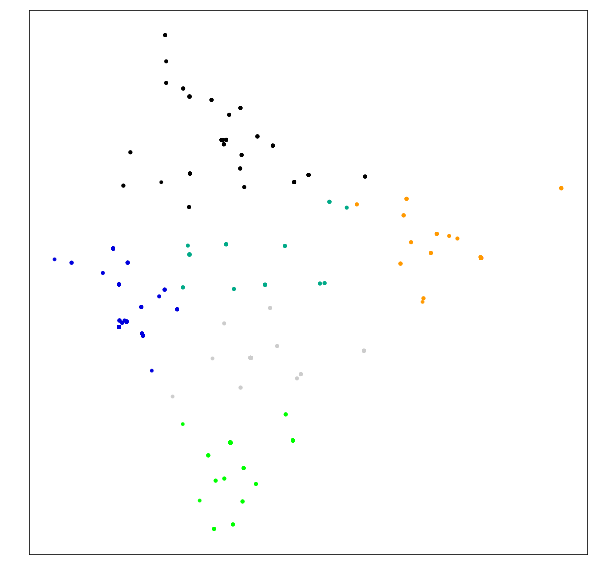

In [5]:
predictions = cluster.predict(dummy_df, save_plot=False)